In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [7]:
df = pd.read_csv(r"D:\Old desktop\Documents\Downloads\co2.csv")
df

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,10.7,7.7,9.4,30,219
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,11.2,8.3,9.9,29,232
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS8,Z,11.7,8.6,10.3,27,240
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS8,Z,11.2,8.3,9.9,29,232


In [37]:
df.shape

(7385, 5)

In [9]:
df.columns

Index(['Make', 'Model', 'Vehicle Class', 'Engine Size(L)', 'Cylinders',
       'Transmission', 'Fuel Type', 'Fuel Consumption City (L/100 km)',
       'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
       'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)'],
      dtype='object')

In [11]:
df.drop(['Make', 'Model', 'Vehicle Class', 'Engine Size(L)', 'Cylinders',
       'Transmission', 'Fuel Type'],axis=1,inplace=True)

In [13]:
df.head()

,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,9.9,6.7,8.5,33,196
1,11.2,7.7,9.6,29,221
2,6.0,5.8,5.9,48,136
3,12.7,9.1,11.1,25,255
4,12.1,8.7,10.6,27,244


In [15]:
df.isna().sum()

Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64

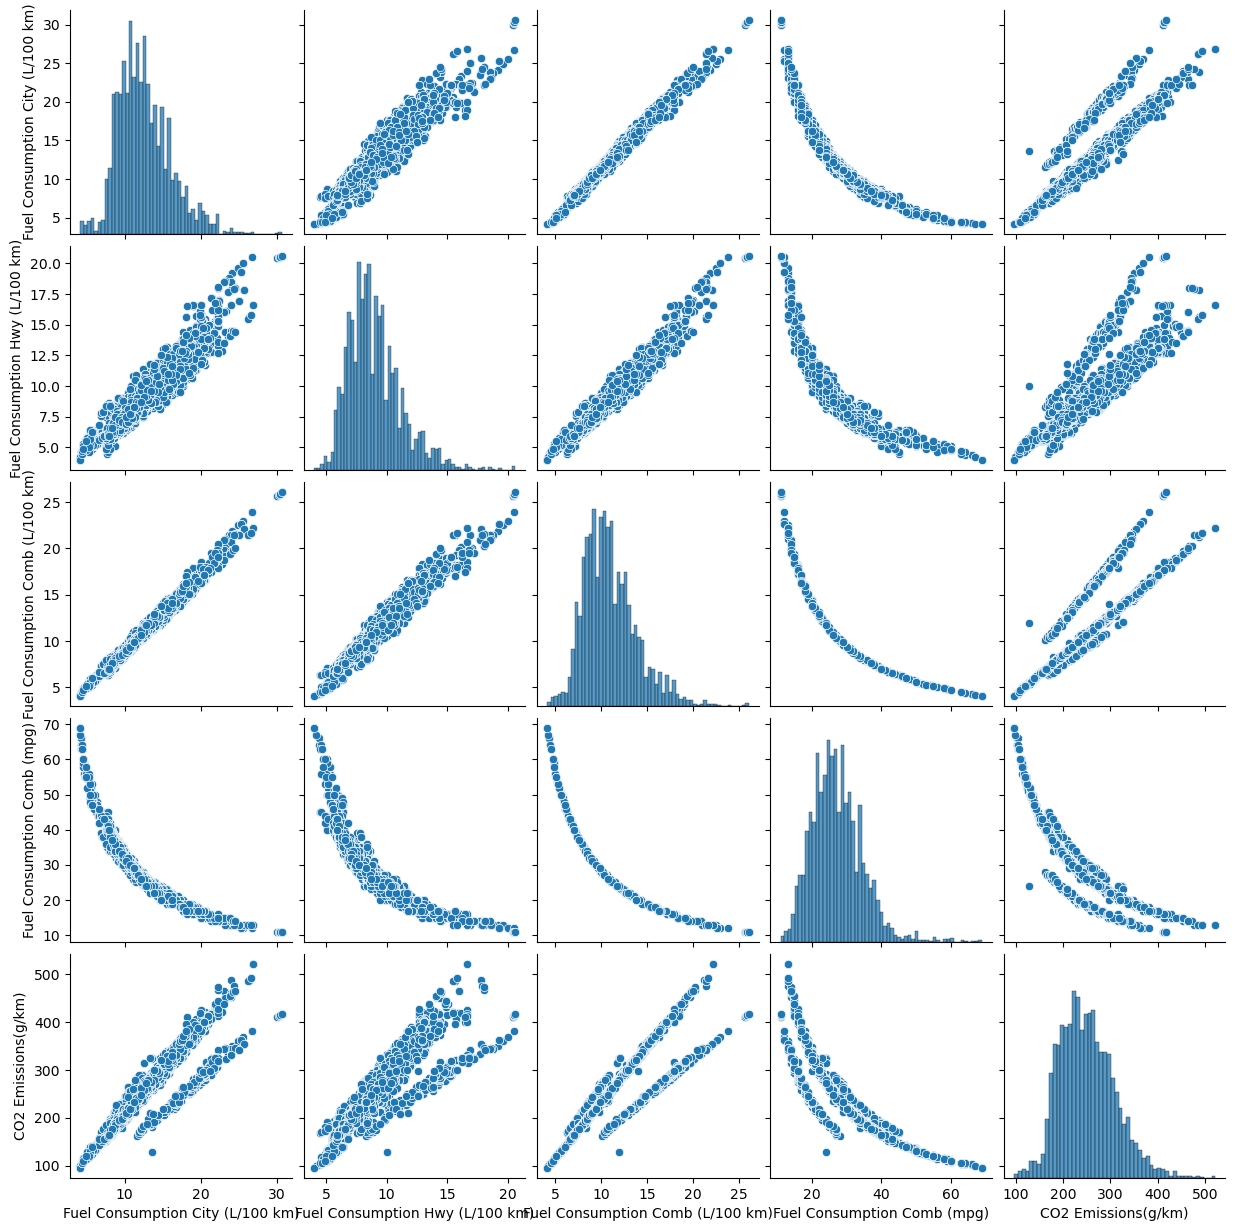

In [27]:
sns.pairplot(df)

In [19]:
df.corr()

,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
Fuel Consumption City (L/100 km),1.000000,0.948180,0.993810,-0.927059,0.919592
Fuel Consumption Hwy (L/100 km),0.948180,1.000000,0.977299,-0.890638,0.883536
Fuel Consumption Comb (L/100 km),0.993810,0.977299,1.000000,-0.925576,0.918052
Fuel Consumption Comb (mpg),-0.927059,-0.890638,-0.925576,1.000000,-0.907426
CO2 Emissions(g/km),0.919592,0.883536,0.918052,-0.907426,1.000000


Text(0, 0.5, 'Fuel Consumption Hwy (L/100 km)')

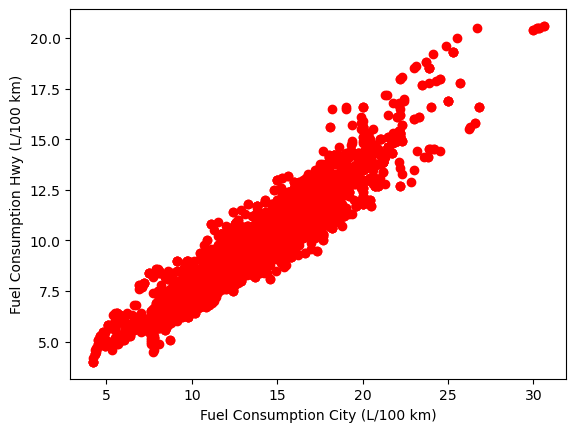

In [21]:
plt.scatter(df['Fuel Consumption City (L/100 km)'],df['Fuel Consumption Hwy (L/100 km)'],color='r')
plt.xlabel('Fuel Consumption City (L/100 km)')
plt.ylabel('Fuel Consumption Hwy (L/100 km)')

Text(0, 0.5, 'Fuel Consumption Comb (mpg)')

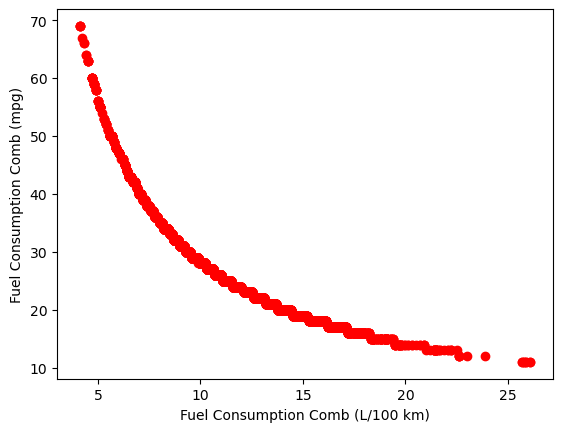

In [23]:
plt.scatter(df['Fuel Consumption Comb (L/100 km)'],df['Fuel Consumption Comb (mpg)'],color='r')
plt.xlabel('Fuel Consumption Comb (L/100 km)')
plt.ylabel('Fuel Consumption Comb (mpg)')

In [33]:
x = df.drop('CO2 Emissions(g/km)',axis='columns')
x.head()

,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg)
0,9.9,6.7,8.5,33
1,11.2,7.7,9.6,29
2,6.0,5.8,5.9,48
3,12.7,9.1,11.1,25
4,12.1,8.7,10.6,27


In [35]:
y = df['CO2 Emissions(g/km)']
y.head()

0    196
1    221
2    136
3    255
4    244
Name: CO2 Emissions(g/km), dtype: int64

In [39]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)

In [41]:
from sklearn.preprocessing import StandardScaler

In [43]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [45]:
x_train

array([[-1.04936647, -0.52119825, -0.89706537,  0.91187326],
       [ 0.03277462,  0.47101105,  0.2083558 , -0.47497256],
       [-0.56525072, -0.47609783, -0.55162125,  0.35713493],
       ...,
       [-0.25199935, -0.11529444, -0.20617714, -0.05891881],
       [-0.87850208, -0.74670036, -0.82797655,  0.77318868],
       [ 0.23211641,  0.47101105,  0.31198903, -0.47497256]])

In [47]:
reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [49]:
reg.coef_

array([ 25.27118386,   0.32191008,   8.13046124, -22.02171447])

In [51]:
reg.intercept_

251.1553491971368

In [67]:
c=reg.predict(scaler.transform([[6.5,5.5,4.4,88]]))
print('Predicted CO2 Emissions(g/km) : ',c)

Predicted CO2 Emissions(g/km) :  [3.31966794]


C:\Users\Friday\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [69]:
y_predict=reg.predict(x_test)

In [71]:
y_predict

array([253.89611253, 321.58806901, 307.90303573, ..., 206.36569814,
       230.1281256 , 322.26417171])

In [73]:
score = r2_score(y_test,y_predict)
print(score)

0.8624533302376045
